<a href="https://colab.research.google.com/github/Disha2704/Classification-of-Architectural-Heritage-Images-Using-Deep-Learning-Techniques/blob/main/heritage_prediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
dataset_path = "/content/gdrive/MyDrive/heritage(final-dataset)"



In [5]:

import pathlib
data_dir = pathlib.Path(dataset_path)
data_dir

PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Western ghats/gettyimages-506921458-612x612.jpg'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Western ghats/gettyimages-506921606-612x612.jpg'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Western ghats/gettyimages-680287540-612x612.jpg'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Western ghats/gettyimages-531654739-612x612.jpg'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Western ghats/gettyimages-1269978911-612x612.jpg')]

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1008


In [8]:
AGRA_FORT= list(data_dir.glob('AGRA FORT/*'))
AGRA_FORT[:5]

[PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/AGRA FORT/agrafort1.jfif'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/AGRA FORT/agrafort2.jfif'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/AGRA FORT/agrafort3.jfif'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/AGRA FORT/agrafort4.jfif'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/AGRA FORT/agrafort5.jfif')]

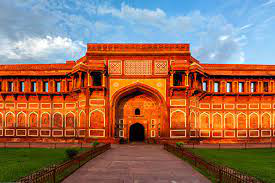

In [9]:
PIL.Image.open((AGRA_FORT[1]))

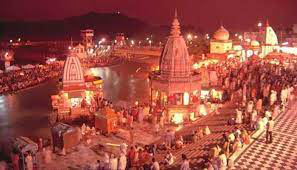

In [10]:
AYODHYA = list(data_dir.glob('AYODHYA/*'))
PIL.Image.open((AYODHYA[6]))

In [11]:
heritage_images_dict = {
    'Aaina Mahal Palace': list(data_dir.glob('Aaina Mahal Palace/*')),
    'Agakhan Palace': list(data_dir.glob('Agakhan Palace/*')),
    'AGRA FORT': list(data_dir.glob('AGRA FORT/*')),
    'AGRASEN KI BAOLI': list(data_dir.glob('AGRASEN KI BAOLI/*')),
    'Ajanta Ellora Caves': list(data_dir.glob('Ajanta Ellora Caves/*')),
    'ALWAR FORTA': list(data_dir.glob('ALWAR FORTA/*')),
    'AMBER FORT': list(data_dir.glob('AMBER FORT/*')),
    'Ambernath Shivalaya': list(data_dir.glob('Ambernath Shivalaya/*')),
    'AYODHYA': list(data_dir.glob('AYODHYA/*')),
    'Badami': list(data_dir.glob('Badami/*')),
    'Basilica de Bom Jesus': list(data_dir.glob('Basilica de Bom Jesus/*')),
    'Belur': list(data_dir.glob('Belur/*')),
    'Bhangarh Fort': list(data_dir.glob('Bhangarh Fort/*')),
    'Bijapur': list(data_dir.glob('Bijapur/*')),
    'bodh gaya': list(data_dir.glob('bodh gaya/*')), 
    'Champaner Jain Temple': list(data_dir.glob('Champaner Jain Temple/*')),
    'Champaner-Pavagadh Archaeological Park': list(data_dir.glob('Champaner-Pavagadh Archaeological Park/*')),
    'Chand Minar': list(data_dir.glob('Chand Minar/*')),
    'Chapora Fort': list(data_dir.glob('Chapora Fort/*')),
    'Chhatrapati Shivaji Terminus': list(data_dir.glob('Chhatrapati Shivaji Terminus/*')),
    'Chola Temple': list(data_dir.glob('Chola Temple/*')), 
    'Church of Holy Jesus': list(data_dir.glob('Church of Holy Jesus/*')),
    'Church of St. Francis of Assisi': list(data_dir.glob('Church of St. Francis of Assisi/*')),
    'Churches and Convents of Old Goa': list(data_dir.glob('Churches and Convents of Old Goa/*')),
    'CITY PALACE': list(data_dir.glob('CITY PALACE/*')),
    'darjeeling': list(data_dir.glob('darjeeling/*')),
    'Deekshabhoomi': list(data_dir.glob('Deekshabhoomi/*')),
    'Devagiri Daulatabad Fort': list(data_dir.glob('Devagiri Daulatabad Fort/*')),
    'Dholavira': list(data_dir.glob('Dholavira/*')),
    'Diu Fort together with the inside building': list(data_dir.glob('Diu Fort together with the inside building/*')),
    'Dwarkadhish Temple': list(data_dir.glob('Dwarkadhish Temple/*')),
    'FATEHPUR SIKRI': list(data_dir.glob('FATEHPUR SIKRI/*')),
    'Fort Aguada': list(data_dir.glob('Fort Aguada/*')),
    'Fort Terekhol': list(data_dir.glob('Fort Terekhol/*')),
    'Gateway of India': list(data_dir.glob('Gateway of India/*')),
    'Global Vipassana Pagoda': list(data_dir.glob('Global Vipassana Pagoda/*')), 
    'GOLDEN TEMPLE': list(data_dir.glob('GOLDEN TEMPLE/*')),
    'Halebidu': list(data_dir.glob('Halebidu/*')),
    'Hampi': list(data_dir.glob('Hampi/*')),
    'HAWA MAHAL': list(data_dir.glob('HAWA MAHAL/*')),
    'HUMAYUS TOMB': list(data_dir.glob('HUMAYUS TOMB/*')), 
    'INDIA GATE': list(data_dir.glob('INDIA GATE/*')),
    'JAISALMER FORT': list(data_dir.glob('JAISALMER FORT/*')),
    'Jallianwala Bagh': list(data_dir.glob('Jallianwala Bagh/*')),
    'JANTAR MANTAR': list(data_dir.glob('JANTAR MANTAR/*')),
    'KANGRA FORT': list(data_dir.glob('KANGRA FORT/*')),
    'KASHI VISHWANATH TEMPLE VARANASI': list(data_dir.glob('KASHI VISHWANATH TEMPLE VARANASI/*')),
    'kaziranga': list(data_dir.glob('kaziranga/*')),
    'konark sun temple': list(data_dir.glob('konark sun temple/*')),
    'Kumbhalgarh Fort': list(data_dir.glob('Kumbhalgarh Fort/*')),
    'Laxmi Vilas Palace': list(data_dir.glob('Laxmi Vilas Palace/*')),
    'LEH PALACE': list(data_dir.glob('LEH PALACE/*')),
    'Mahabalipuram': list(data_dir.glob('Mahabalipuram/*')),
    'MAHABODHI TEMPLE': list(data_dir.glob('MAHABODHI TEMPLE/*')),
    'MAHRAULI ARCAHEOLOGICAL': list(data_dir.glob('MAHRAULI ARCAHEOLOGICAL/*')),
    'manas': list(data_dir.glob('manas/*')), 
    'Mehrangarh Fort': list(data_dir.glob('Mehrangarh Fort/*')),
    'Morarji Castle': list(data_dir.glob('Morarji Castle/*')),
    'Moti Daman Fortwall II': list(data_dir.glob('Moti Daman Fortwall II/*')),
    'Moti Daman Fortwalls I': list(data_dir.glob('Moti Daman Fortwalls I/*')),
    'Moti Daman fortwalls III': list(data_dir.glob('Moti Daman fortwalls III/*')), 
    'Mysore-(Mysuru)': list(data_dir.glob('Mysore-(Mysuru)/*')),
    'Nahargarh Fort': list(data_dir.glob('Nahargarh Fort/*')),
    'National Museum': list(data_dir.glob('National Museum/*')),
    'National Museum': list(data_dir.glob('National Museum/*')),
    'Nilgiri mountain railway': list(data_dir.glob('Nilgiri mountain railway/*')),
    'Old Mosque (Jama Masjid)': list(data_dir.glob('Old Mosque (Jama Masjid)/*')),
    'Pattadakal': list(data_dir.glob('Pattadakal/*')),
    'Prag Mahal Bhuj': list(data_dir.glob('Prag Mahal Bhuj/*')),
    'Qila Mubarak': list(data_dir.glob('Qila Mubarak/*')),
    'QUTUB MINAR': list(data_dir.glob('QUTUB MINAR/*')),
    'Raigad Fort': list(data_dir.glob('Raigad Fort/*')),
    'Rajabai Clock Tower': list(data_dir.glob('Rajabai Clock Tower/*')),
    'Ramappa temple': list(data_dir.glob('Ramappa temple/*')),
    'Rani Ki Vav': list(data_dir.glob('Rani Ki Vav/*')), 
    'RED FORT DELHI': list(data_dir.glob('RED FORT DELHI/*')),
    'Ruined Church': list(data_dir.glob('Ruined Church/*')),
    'Shaniwar Wada': list(data_dir.glob('Shaniwar Wada/*')),
    'Sidi Saiyyed Mosque': list(data_dir.glob('Sidi Saiyyed Mosque/*')),
    'Somnath Temple': list(data_dir.glob('Somnath Temple/*')), 
    'St. Paul’s Church': list(data_dir.glob('St. Paul’s Church/*')),
    'Stok Palace': list(data_dir.glob('Stok Palace/*')),
    'Sun Temple': list(data_dir.glob('Sun Temple/*')),
    'sundarban': list(data_dir.glob('sundarban/*')),
    'TAJ MAHAL': list(data_dir.glob('TAJ MAHAL/*')),
    'Teen Darwaza': list(data_dir.glob('Teen Darwaza/*')),
    'The Chapel of Our Lady of Rosario': list(data_dir.glob('The Chapel of Our Lady of Rosario/*')),
    'The Church of Our Lady of Remedios': list(data_dir.glob('The Church of Our Lady of Remedios/*')),
    'Tomb of Salabat Khan': list(data_dir.glob('Tomb of Salabat Khan/*')),
    'Tower of Silence': list(data_dir.glob('Tower of Silence/*')),
    'Uperkot Fort': list(data_dir.glob('Uperkot Fort/*')),
    'Vadakkunnathan Temple': list(data_dir.glob('Vadakkunnathan Temple/*')),
    'Viceroy Arch': list(data_dir.glob('Viceroy Arch/*')), 
    'Viceroy Arch': list(data_dir.glob('Viceroy Arch/*')),
    'Vijaydurg Fort': list(data_dir.glob('Vijaydurg Fort/*')),
    'Wai Ghat and Temples': list(data_dir.glob('Wai Ghat and Temples/*')),
    'Western ghats': list(data_dir.glob('Western ghats/*'))
}
 

In [12]:
len(heritage_images_dict)


95

In [13]:
heritage_labels_dict = {
  'AGRA FORT': 0,
 'AGRASEN KI BAOLI': 1,
 'ALWAR FORTA': 2,
 'AMBER FORT': 3,
 'AYODHYA': 4,
 'Aaina Mahal Palace': 5,
 'Agakhan Palace': 6,
 'Ajanta Ellora Caves': 7,
 'Ambernath Shivalaya': 8,
 'Badami': 9,
 'Basilica de Bom Jesus': 10,
 'Belur': 11,
 'Bhangarh Fort': 12,
 'Bijapur': 13,
 'CITY PALACE': 14,
 'Champaner-Pavagadh Archaeological Park': 15,
 'Chand Minar': 16,
 'Chapora Fort': 17,
 'Chhatrapati Shivaji Terminus': 18,
 'Chola Temple': 19,
 'Church of St. Francis of Assisi': 20,
 'Churches and Convents of Old Goa': 21,
 'Deekshabhoomi': 22,
 'Devagiri Daulatabad Fort': 23,
 'Dholavira': 24,
 'Dwarkadhish Temple': 25,
 'FATEHPUR SIKRI': 26,
 'Fort Aguada': 27,
 'Fort Terekhol': 28,
 'GOLDEN TEMPLE': 29,
 'Gateway of India': 30,
 'Global Vipassana Pagoda': 31,
 'HAWA MAHAL': 32,
 'HUMAYU_S TOMB': 33,
 'Halebidu': 34,
 'Hampi': 35,
 'INDIA GATE': 36,
 'JAISALMER FORT': 37,
 'JANTAR MANTAR': 38,
 'Jallianwala Bagh': 39,
 'KANGRA FORT': 40,
 'KASHI VISHWANATH TEMPLE VARANASI': 41,
 'Kumbhalgarh Fort': 42,
 'LEH PALACE': 43,
 'Laxmi Vilas Palace': 44,
 'MAHABODHI TEMPLE': 45,
 'MAHRAULI ARCAHEOLOGICAL': 46,
 'Mahabalipuram': 47,
 'Mehrangarh Fort': 48,
 'Morarji Castle': 49,
 'Mysore-(Mysuru)': 50,
 'Nahargarh Fort': 51,
 'National Museum': 52,
 'New Palace': 53,
 'Nilgiri mountain railway': 54,
 'Pattadakal': 55,
 'Prag Mahal Bhuj': 56,
 'Pratapgad Fort': 57,
 'QUTUB MINAR': 58,
 'Qila Mubarak': 59,
 'RED FORT DELHI': 60,
 'Raigad Fort': 61,
 'Rajabai Clock Tower': 62,
 'Ramappa temple': 63,
 'Rani Ki Vav': 64,
 'Shaniwar Wada': 65,
 'Sidi Saiyyed Mosque': 66,
 'Somnath Temple': 67,
 'Stok Palace': 68,
 'Sun Temple': 69,
 'TAJ MAHAL': 70,
 'Teen Darwaza': 71,
 'Tomb of Salabat Khan': 72,
 'Uperkot Fort': 73,
 'Vadakkunnathan Temple': 74,
 "Viceroy's Arch": 75,
 'Vijay Vilas Palace': 76,
 'Vijaydurg Fort': 77,
 'Wai Ghat and Temples': 77,
 'Western ghats': 79,
 'bodh gaya': 80,
 'darjeeling': 81,
 'kaziranga': 82,
 'konark sun temple': 83,
 'manas': 84,
 'sundarban': 85}
   


In [14]:
heritage_images_dict['Rani Ki Vav'][:5]

[PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Rani Ki Vav/download (5).jpg'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Rani Ki Vav/download.jpg'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Rani Ki Vav/download (1).jpg'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Rani Ki Vav/download (2).jpg'),
 PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Rani Ki Vav/images.jpg')]

In [15]:
(heritage_images_dict['Rani Ki Vav'][0])

PosixPath('/content/gdrive/MyDrive/heritage(final-dataset)/Rani Ki Vav/download (5).jpg')

In [16]:
img = cv2.imread(str(heritage_images_dict['Rani Ki Vav'][0]))

In [17]:
img.shape

(168, 300, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
# X, y = [], []

for heritage_name, images in heritage_images_dict.items():
  print(heritage_name, len(images))


Aaina Mahal Palace 15
Agakhan Palace 14
AGRA FORT 32
AGRASEN KI BAOLI 13
Ajanta Ellora Caves 19
ALWAR FORTA 11
AMBER FORT 23
Ambernath Shivalaya 11
AYODHYA 27
Badami 28
Basilica de Bom Jesus 13
Belur 32
Bhangarh Fort 22
Bijapur 35
bodh gaya 65
Champaner Jain Temple 0
Champaner-Pavagadh Archaeological Park 15
Chand Minar 11
Chapora Fort 5
Chhatrapati Shivaji Terminus 12
Chola Temple 35
Church of Holy Jesus 0
Church of St. Francis of Assisi 9
Churches and Convents of Old Goa 34
CITY PALACE 36
darjeeling 226
Deekshabhoomi 12
Devagiri Daulatabad Fort 8
Dholavira 12
Diu Fort together with the inside building 0
Dwarkadhish Temple 7
FATEHPUR SIKRI 38
Fort Aguada 8
Fort Terekhol 10
Gateway of India 17
Global Vipassana Pagoda 19
GOLDEN TEMPLE 29
Halebidu 38
Hampi 27
HAWA MAHAL 27
HUMAYUS TOMB 0
INDIA GATE 16
JAISALMER FORT 26
Jallianwala Bagh 15
JANTAR MANTAR 16
KANGRA FORT 29
KASHI VISHWANATH TEMPLE VARANASI 17
kaziranga 42
konark sun temple 145
Kumbhalgarh Fort 28
Laxmi Vilas Palace 10
LEH PA

In [21]:
heritage_labels_dict['Badami']

9

In [22]:
X, y = [], []

for heritage_name, images in heritage_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)

        y.append(heritage_labels_dict[heritage_name])

In [23]:
# len(X) #2254
print(X[1])


[[[160 191 200]
  [158 189 197]
  [155 185 195]
  ...
  [  3  24  69]
  [  0  21  68]
  [ 15  36  97]]

 [[174 203 212]
  [173 201 210]
  [170 199 209]
  ...
  [  1   3  50]
  [ 17  50 100]
  [ 41  67 125]]

 [[177 205 212]
  [176 203 213]
  [174 200 211]
  ...
  [ 25  44  94]
  [ 66  99 150]
  [ 13  43  98]]

 ...

 [[152 117  60]
  [158 116  58]
  [185 137  78]
  ...
  [152 113  82]
  [144 103  70]
  [127  88  59]]

 [[156 135  86]
  [189 161 110]
  [160 127  74]
  ...
  [124  69  37]
  [147  90  55]
  [146  89  59]]

 [[107  95  55]
  [ 92  73  33]
  [ 98  73  31]
  ...
  [140  76  38]
  [133  64  28]
  [142  71  38]]]


In [24]:
len(y)

2254

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
X

array([[[[235, 233, 232],
         [235, 233, 232],
         [235, 233, 232],
         ...,
         [212, 204, 197],
         [215, 207, 200],
         [215, 207, 200]],

        [[235, 233, 232],
         [235, 233, 232],
         [235, 233, 232],
         ...,
         [213, 205, 198],
         [216, 208, 201],
         [216, 208, 201]],

        [[235, 233, 232],
         [235, 233, 232],
         [235, 233, 232],
         ...,
         [213, 207, 200],
         [216, 210, 202],
         [216, 210, 202]],

        ...,

        [[  8,  23,  55],
         [  7,  22,  54],
         [  9,  26,  58],
         ...,
         [  4,  11,  20],
         [  1,   4,  15],
         [ 52,  58,  71]],

        [[ 11,  26,  58],
         [ 17,  32,  64],
         [ 17,  34,  65],
         ...,
         [  4,   9,  18],
         [  4,   9,  20],
         [ 44,  50,  63]],

        [[  6,  21,  54],
         [ 25,  40,  72],
         [  7,  24,  55],
         ...,
         [  0,   3,  12],
        

In [27]:
from PIL import Image
image = Image.fromarray(X[1])

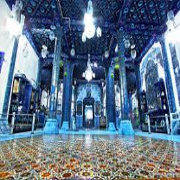

In [28]:
image

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [31]:
print(len(X_train),len(X_test))

1690 564


In [32]:
len(X)

2254

In [37]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
# model = Sequential([
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(86)
# ])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
              
# model.fit(X_train_scaled, y_train, epochs=30)    

In [ ]:
# model.evaluate(X_test_scaled,y_test)

In [ ]:
# predictions = model.predict(X_test_scaled)
# predictions

In [ ]:
# score = tf.nn.softmax(predictions[0])

In [ ]:
# np.argmax(score)

In [ ]:
# y_test[0]

In [ ]:
# plt.axis('off')
# plt.imshow(X[0])

In [33]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [38]:
model = Sequential([
  data_augmentation,

  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(86,activation="softmax")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


53/53 [==============================] - 24s 143ms/step - loss: 4.0442 - accuracy: 0.1308
Epoch 2/30
53/53 [==============================] - 9s 175ms/step - loss: 3.6115 - accuracy: 0.1982
Epoch 3/30
53/53 [==============================] - 10s 199ms/step - loss: 3.3254 - accuracy: 0.2491
Epoch 4/30
53/53 [==============================] - 8s 141ms/step - loss: 3.1253 - accuracy: 0.2793
Epoch 5/30
53/53 [==============================] - 9s 165ms/step - loss: 2.9541 - accuracy: 0.3059
Epoch 6/30
53/53 [==============================] - 8s 142ms/step - loss: 2.7861 - accuracy: 0.3355
Epoch 7/30
53/53 [==============================] - 9s 166ms/step - loss: 2.5544 - accuracy: 0.3828
Epoch 8/30
53/53 [==============================] - 9s 167ms/step - loss: 2.3979 - accuracy: 0.4077
Epoch 9/30
53/53 [==============================] - 8s 144ms/step - loss: 2.1848 - accuracy: 0.4533
Epoch 10/30
53/53 [==============================] - 9s 168ms/step - loss: 2.0204 - accuracy: 0.4710
Epoch 11

In [39]:
model.evaluate(X_test_scaled,y_test)


18/18 [==============================] - 1s 23ms/step - loss: 6.0551 - accuracy: 0.3440


[6.055084705352783, 0.3439716398715973]

In [40]:
predictions = model.predict(X_test_scaled)
predictions


18/18 [==============================] - 0s 13ms/step


array([[1.3581252e-25, 4.4380758e-19, 1.7613696e-26, ..., 3.0215521e-29,
        1.0000000e+00, 1.2789260e-16],
       [4.3343302e-09, 2.9645051e-07, 1.4435576e-16, ..., 2.1611279e-01,
        1.3126908e-08, 2.4149743e-12],
       [1.9536379e-37, 1.1991423e-22, 0.0000000e+00, ..., 8.0100668e-24,
        1.7572735e-21, 1.1381368e-34],
       ...,
       [3.1709423e-11, 9.9288665e-13, 1.7495320e-05, ..., 3.2963252e-09,
        2.9444835e-05, 6.2272110e-12],
       [2.0089850e-05, 2.9326682e-06, 6.6372359e-06, ..., 9.6925956e-10,
        2.6159282e-04, 1.9947022e-06],
       [1.2529543e-09, 7.0285798e-11, 8.2266862e-14, ..., 9.9764505e-22,
        5.8656501e-06, 1.2542587e-03]], dtype=float32)

In [41]:
score = tf.nn.softmax(predictions[22])

In [42]:
score

<tf.Tensor: shape=(86,), dtype=float32, numpy=
array([0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140567,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.01140479, 0.01140479, 0.01140479, 0.01140479, 0.01140479,
       0.011404

In [43]:

score[np.argmax(score)] #85 is index


<tf.Tensor: shape=(), dtype=float32, numpy=0.03034676>

In [44]:
y_test[22]

85

In [45]:
class_map = dict([(v, k) for k, v in heritage_labels_dict.items()])


In [46]:
class_map

{0: 'AGRA FORT',
 1: 'AGRASEN KI BAOLI',
 2: 'ALWAR FORTA',
 3: 'AMBER FORT',
 4: 'AYODHYA',
 5: 'Aaina Mahal Palace',
 6: 'Agakhan Palace',
 7: 'Ajanta Ellora Caves',
 8: 'Ambernath Shivalaya',
 9: 'Badami',
 10: 'Basilica de Bom Jesus',
 11: 'Belur',
 12: 'Bhangarh Fort',
 13: 'Bijapur',
 14: 'CITY PALACE',
 15: 'Champaner-Pavagadh Archaeological Park',
 16: 'Chand Minar',
 17: 'Chapora Fort',
 18: 'Chhatrapati Shivaji Terminus',
 19: 'Chola Temple',
 20: 'Church of St. Francis of Assisi',
 21: 'Churches and Convents of Old Goa',
 22: 'Deekshabhoomi',
 23: 'Devagiri Daulatabad Fort',
 24: 'Dholavira',
 25: 'Dwarkadhish Temple',
 26: 'FATEHPUR SIKRI',
 27: 'Fort Aguada',
 28: 'Fort Terekhol',
 29: 'GOLDEN TEMPLE',
 30: 'Gateway of India',
 31: 'Global Vipassana Pagoda',
 32: 'HAWA MAHAL',
 33: 'HUMAYU_S TOMB',
 34: 'Halebidu',
 35: 'Hampi',
 36: 'INDIA GATE',
 37: 'JAISALMER FORT',
 38: 'JANTAR MANTAR',
 39: 'Jallianwala Bagh',
 40: 'KANGRA FORT',
 41: 'KASHI VISHWANATH TEMPLE VARANAS

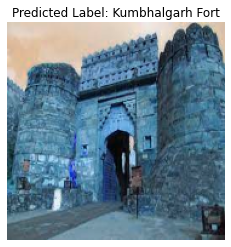

In [61]:
predicted_label = np.argmax(tf.nn.softmax(predictions[48]))
predicted_name = class_map[predicted_label]
plt.imshow(X_test[320])
plt.title("Predicted Label: {}".format(predicted_name))
plt.grid()
plt.axis('off')
plt.show()
